# 1. Install Dependencies and Setup


In [1]:
# pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [ ]:
# pip list

In [3]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images


In [59]:
import cv2
import imghdr

In [7]:
data_dir = 'data' 

In [8]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [9]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image data\PokemonData\Abra
Issue with image data\PokemonData\Aerodactyl
Issue with image data\PokemonData\Alakazam
Issue with image data\PokemonData\Alolan Sandslash
Issue with image data\PokemonData\Arbok
Issue with image data\PokemonData\Arcanine
Issue with image data\PokemonData\Articuno
Issue with image data\PokemonData\Beedrill
Issue with image data\PokemonData\Bellsprout
Issue with image data\PokemonData\Blastoise
Issue with image data\PokemonData\Bulbasaur
Issue with image data\PokemonData\Butterfree
Issue with image data\PokemonData\Caterpie
Issue with image data\PokemonData\Chansey
Issue with image data\PokemonData\Charizard
Issue with image data\PokemonData\Charmander
Issue with image data\PokemonData\Charmeleon
Issue with image data\PokemonData\Clefable
Issue with image data\PokemonData\Clefairy
Issue with image data\PokemonData\Cloyster
Issue with image data\PokemonData\Cubone
Issue with image data\PokemonData\Dewgong
Issue with image data\PokemonData\Diglett
Is

# 3. Load Data


In [10]:
import numpy as np
from matplotlib import pyplot as plt
import os

In [11]:
data = tf.keras.utils.image_dataset_from_directory('data/PokemonData/', label_mode='categorical')



Found 6820 files belonging to 150 classes.


In [ ]:
classes = os.listdir('data/PokemonData/')
classes

In [13]:
data_iterator = data.as_numpy_iterator()

In [14]:
batch = data_iterator.next()

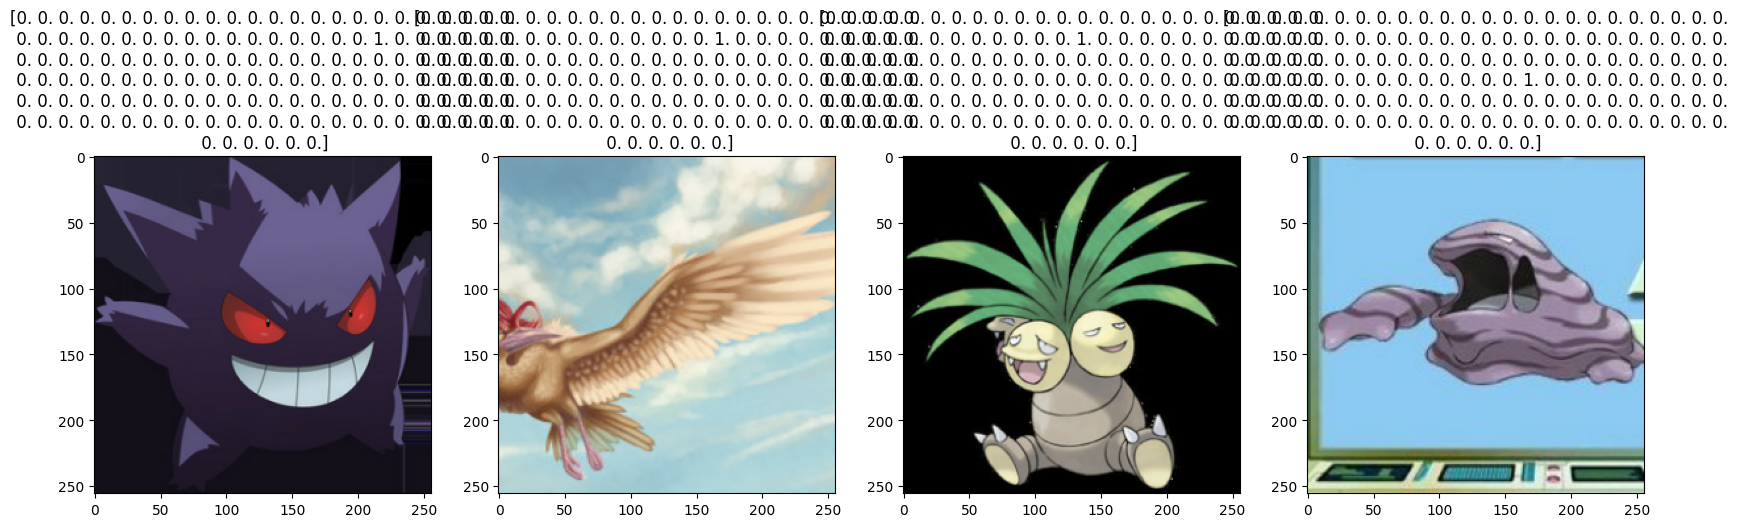

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data


In [16]:
data = data.map(lambda x,y: (x/255, y))

In [17]:
data.as_numpy_iterator().next()

(array([[[[2.74509806e-02, 5.49019612e-02, 0.00000000e+00],
          [3.63886327e-01, 3.91337305e-01, 3.28745395e-01],
          [7.24931061e-01, 7.54151344e-01, 6.80024505e-01],
          ...,
          [4.85860914e-01, 7.34689057e-01, 4.59589452e-01],
          [4.54136044e-01, 7.31181085e-01, 4.44676787e-01],
          [4.15686280e-01, 7.21568644e-01, 4.23529416e-01]],
 
         [[1.96629897e-01, 2.20235914e-01, 1.80713847e-01],
          [4.68034863e-01, 4.91640866e-01, 4.47256267e-01],
          [7.50760734e-01, 7.75557816e-01, 7.22289205e-01],
          ...,
          [4.30889785e-01, 7.30757713e-01, 4.22975838e-01],
          [4.26879525e-01, 7.25451171e-01, 4.21944857e-01],
          [4.19531256e-01, 7.17723668e-01, 4.17761952e-01]],
 
         [[4.39782470e-01, 4.59390312e-01, 4.35860902e-01],
          [6.23905718e-01, 6.43513560e-01, 6.18350804e-01],
          [8.04216564e-01, 8.24148118e-01, 7.93513358e-01],
          ...,
          [3.66975009e-01, 7.23778486e-01, 3.8790

# 5. Split Data


In [18]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [19]:
test_size

21

In [20]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model


In [21]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 150), dtype=tf.float32, name=None))>

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [23]:
model = Sequential()

In [24]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(150, activation='softmax'))  # 150 output units for 150 classes


In [25]:
model.compile('adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 7. Train


In [27]:
logdir='logs'

In [28]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [29]:
hist = model.fit(train, epochs=7, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10


149/149 [==============================] - 73s 481ms/step - loss: 4.5659 - accuracy: 0.0600 - val_loss: 3.6269 - val_accuracy: 0.1592
Epoch 2/10
149/149 [==============================] - 66s 438ms/step - loss: 2.9261 - accuracy: 0.2980 - val_loss: 2.7952 - val_accuracy: 0.3490
Epoch 3/10
149/149 [==============================] - 66s 442ms/step - loss: 1.7382 - accuracy: 0.5768 - val_loss: 2.6077 - val_accuracy: 0.4204
Epoch 4/10
149/149 [==============================] - 67s 450ms/step - loss: 0.8151 - accuracy: 0.7873 - val_loss: 2.8293 - val_accuracy: 0.4464
Epoch 5/10
149/149 [==============================] - 66s 439ms/step - loss: 0.3526 - accuracy: 0.9163 - val_loss: 3.2372 - val_accuracy: 0.4479
Epoch 6/10
149/149 [==============================] - 62s 416ms/step - loss: 0.1825 - accuracy: 0.9587 - val_loss: 3.2237 - val_accuracy: 0.4881
Epoch 7/10
149/149 [==============================] - 63s 418ms/step - loss: 0.1367 - accuracy: 0.9711 - val_loss: 3.4497 - val_accuracy: 0.4

# 8. Plot Performance


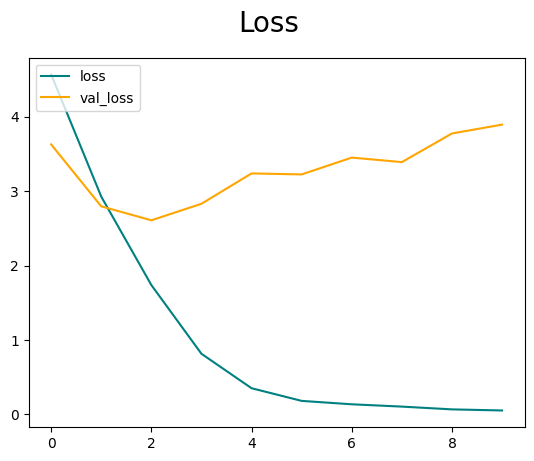

In [30]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

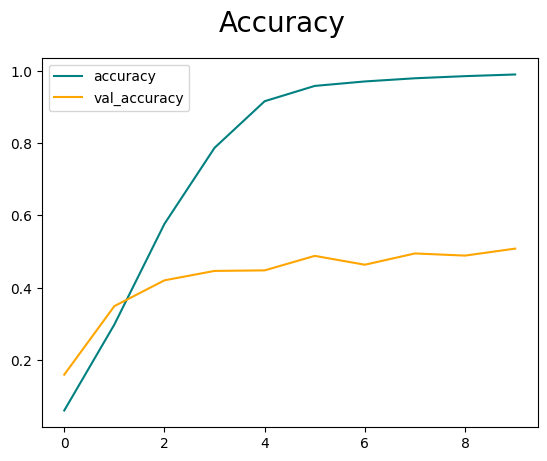

In [31]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate


In [32]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [33]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [34]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 83ms/step


In [35]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.46397188, shape=(), dtype=float32) tf.Tensor(0.39285713, shape=(), dtype=float32) tf.Tensor(0.9929266, shape=(), dtype=float32)


# 10. Test


In [36]:
import cv2

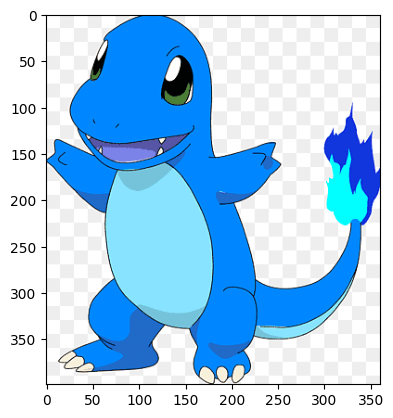

In [37]:
img = cv2.imread('check.png')
plt.imshow(img)
plt.show()

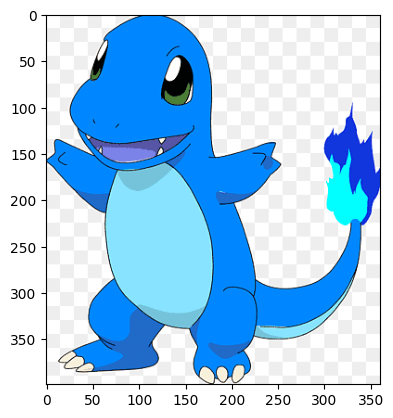

In [44]:
image_path = 'check.png'
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
resize = tf.image.resize(img_rgb, (256, 256)) # Resize the image to match the model's input size
input_image = np.expand_dims(resize / 255, 0)
plt.imshow(img)
plt.show()

In [45]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 23ms/step


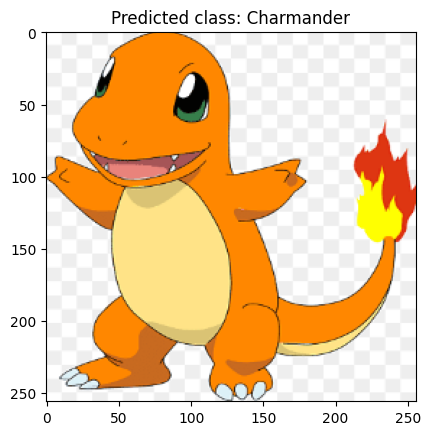

In [46]:
image_path = 'check.png'
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
resize = tf.image.resize(img_rgb, (256, 256)) # Resize the image to match the model's input size
input_image = np.expand_dims(resize / 255, 0)  # Normalize and add batch dimension

# Use the model to make predictions
predictions = model.predict(input_image)

# Get the predicted class index (index with the highest probability)
predicted_class_index = np.argmax(predictions)

# Map the class index to the class name
# class_names = ['class1', 'class2', ..., 'class150']  # Replace with your class names
predicted_class_name = classes[predicted_class_index]

# Display the image with the predicted class name
plt.imshow(resize.numpy().astype(int))
plt.title(f'Predicted class: {predicted_class_name}')
plt.show()

In [47]:
# yhat

In [48]:
# plt.show(yhat)

# 11. Save the Model


In [49]:
from tensorflow.keras.models import load_model

In [50]:
model.save(os.path.join('models','imageclassifier.h5'))

c:\Users\njaya\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [64]:
new_model = load_model('./models/imageclassifier.h5')

1/1 [==============================] - 0s 21ms/step


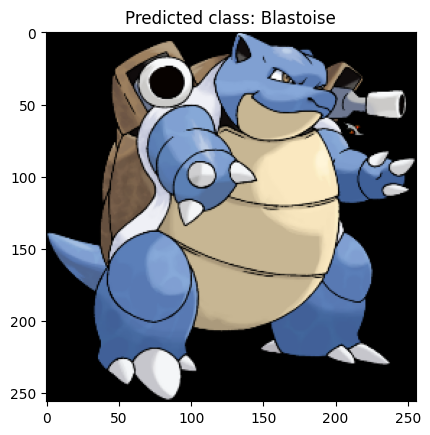

In [63]:
image_path = 'check2.png'
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
resize = tf.image.resize(img_rgb, (256, 256)) # Resize the image to match the model's input size
input_image = np.expand_dims(resize / 255, 0)  # Normalize and add batch dimension

# Use the model to make predictions
predictions = new_model.predict(input_image)

# Get the predicted class index (index with the highest probability)
predicted_class_index = np.argmax(predictions)

# Map the class index to the class name
# class_names = ['class1', 'class2', ..., 'class150']  # Replace with your class names
predicted_class_name = classes[predicted_class_index]

# Display the image with the predicted class name
plt.imshow(resize.numpy().astype(int))
plt.title(f'Predicted class: {predicted_class_name}')
plt.show()

In [61]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 36ms/step


array([[2.09034429e-10, 1.73460511e-19, 1.17460588e-12, 2.13318991e-30,
        1.34718737e-17, 3.47333599e-12, 3.25893973e-28, 1.19669278e-16,
        4.84493952e-15, 5.87096615e-13, 4.14988799e-22, 3.06427130e-28,
        4.74057703e-11, 8.18401910e-18, 3.30087313e-09, 9.99951005e-01,
        1.57998281e-10, 4.35945193e-18, 1.46413301e-17, 5.50676434e-26,
        1.18597450e-12, 1.58811714e-20, 1.09278245e-14, 6.62999972e-25,
        8.37687645e-12, 1.46082066e-15, 9.18238793e-27, 5.74651793e-09,
        8.69294122e-21, 1.57188117e-11, 5.76192956e-12, 8.03078104e-10,
        7.11964504e-13, 1.44684664e-09, 9.85199313e-24, 9.19111605e-19,
        1.11879714e-18, 2.46459195e-14, 1.88982829e-09, 1.22699712e-05,
        6.35799234e-23, 1.52514807e-18, 4.99051547e-18, 1.44574641e-16,
        7.59011518e-26, 1.39356121e-18, 1.82578296e-16, 8.01615239e-17,
        4.33277511e-11, 4.08895419e-27, 6.34531716e-09, 2.20770731e-15,
        8.62122356e-26, 1.52604762e-10, 3.33776722e-11, 1.737460